In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from matplotlib import cm
from celluloid import Camera
import pickle #store

In [17]:
n = 10 #nb des noeuds
k = 60  #nb des itérations
c = 1/(n+1)

a1 = 30 #longueur de l'espace
b1 = 20 #largeur de l'espace

r_det = ( ((a1**2+b1**2)**(1/2))/5 )*2 #rayon de détection
r_sec = r_det/3  #rayon de sécurité

print(r_det)
print(r_sec)

14.422205101855956
4.8074017006186525


In [18]:
def positionToAdjMatrix(x,y,r_det):
    n=len(x)
    matrix = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            distance_ij = ((x[i]-x[j])**2 + (y[i]-y[j])**2)**(1/2)

            if distance_ij <= r_det :
                matrix[i][j] = 1

    # pas de boucle sur le même noeuds
    for i in range(n):
        matrix[i][i] = 0

    return matrix


def Laplacienne(M):
    #matrice degré
    D = np.identity(len(M[0]))
    degre = np.sum(M,axis=1)
    for i in range(n):
        D[i][i]=degre[i]
    
    #print("\n matrice degre\n",D)
    
    L = D - M
    
    return L

def adjToCom(M):
    #matrice de communication
    C = np.copy(np.array(M))
    facteur=np.sum(M,axis=1)
    C = C.astype('float')
    for i in range(n):
        if facteur[i]==0:
            facteur[i] = 1
        C[i]=C[i]/facteur[i]
    return C


def pMatrix(M):
    I = np.identity(len(M[0]))
    P = I - c*Laplacienne(M)
    
    return P

def randStocastic(n):
    matrix = np.random.rand(n,n)

    m = matrix/matrix.sum(axis=1)[:,None]
    
    return m


def matriceCom(H,W):
    
    I = np.identity(n)
    J = np.ones(n)
    Q = H + I
    Q_ = J - Q
    
    #A = np.multiply(Q,W) + np.multiply(np.dot((np.multiply(W,Q_)),J),I)
    A = np.multiply(H,W)

    return A


def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    plt.show()
    

def mouvement(x,y,A):      
    for i in range(n):
        for j in range(n):
            x[i] += (x[j]-x[i])*A[i][j]
            y[i] += (y[j]-y[i])*A[i][j]
            
    return x,y


# Initialisation

In [19]:
#positionner les robots aléatoirement 
rnd = np.random
rnd.seed(0)

#x = rnd.choice(np.arange(0., a, 5), size=n)
#y = rnd.choice(np.arange(0., b, 5), size=n)

x = [20., 25.,  0., 15., 30., 15.,  5., 15., 25., 10.]

y = [ 0., 15., 10.,  10.,  20.,  0., 10.,  5., 10., 15.]

In [20]:
with open("initialCondition.pkl",'wb') as f :
    pickle.dump([x,y],f)



 matrice de priorité 
 [[0.08912692 0.11614624 0.09788834 0.08848864 0.06880123 0.10489274
  0.07106385 0.14482329 0.15649814 0.06227063]
 [0.1446487  0.09662946 0.10378212 0.16910713 0.01297834 0.01591858
  0.00369391 0.1521202  0.14216976 0.1589518 ]
 [0.16865422 0.13772628 0.07953094 0.13451571 0.02038331 0.11028342
  0.02470538 0.1628034  0.08993488 0.07146247]
 [0.04762994 0.13939113 0.08212419 0.10233945 0.00338287 0.11119758
  0.11020021 0.11107128 0.16991009 0.12275325]
 [0.0919399  0.11176576 0.17841094 0.01540195 0.17051771 0.17150771
  0.05380285 0.03297138 0.08066707 0.09301473]
 [0.13953047 0.10732834 0.24186083 0.02497096 0.05111336 0.03947338
  0.15981941 0.06198193 0.11410896 0.05981236]
 [0.04566382 0.03170513 0.18852989 0.03969289 0.05646805 0.10591586
  0.23582932 0.02789222 0.24069867 0.02760415]
 [0.21121588 0.10137295 0.21128112 0.13083285 0.15990854 0.00847663
  0.06117337 0.02599946 0.06405746 0.02568174]
 [0.07156484 0.09323343 0.01443694 0.15584678 0.1275185

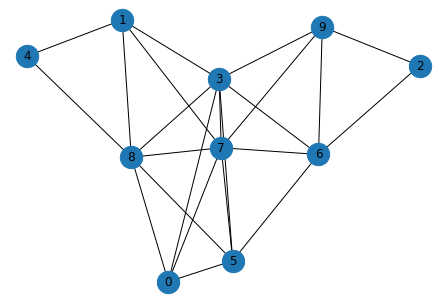

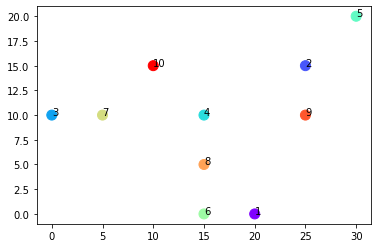

In [21]:
M = positionToAdjMatrix(x,y,r_det)
H = np.array(M).reshape(n,n)

L = Laplacienne(M)
P = pMatrix(H)
W = randStocastic(n)
A = matriceCom(H,W)

print("\n\n matrice de priorité \n",W)

#print("\n matrice adjacence \n", H)


#print("\n\n laplacienne \n", L)


#print("\n\n P \n",P)

#print("\n\n P \n",np.linalg.matrix_power(P,100))


S=W


S = S.sum(axis=0)/n
print("\n\n convergence W \n",S)

#A1 = matriceCom(H,S)
#print("\n\n convergence A \n",A1)

#matrice de communication


print("\n\n matrice de communication :\n", A)

show_graph_with_labels(H)


colors = cm.rainbow(np.linspace(0, 1, n))
plt.scatter(x[0:], y[0:], c=colors, s=100)
    
for i in range(1,n+1):
    plt.annotate(i, (x[i-1], y[i-1]))

# Exp1 : statique avec P

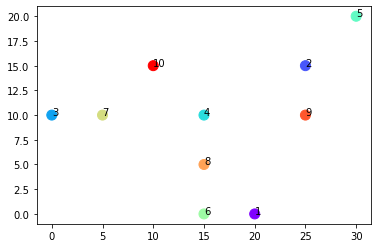

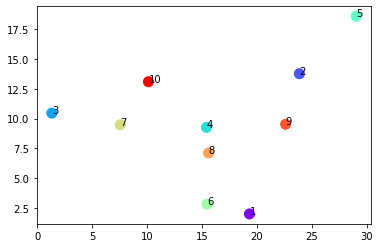

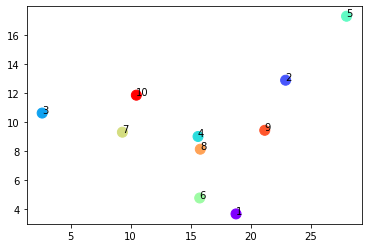

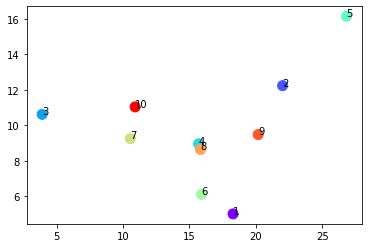

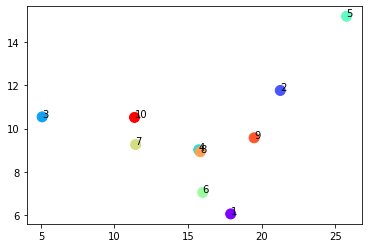

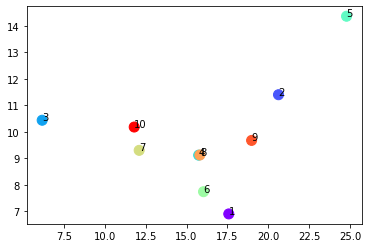

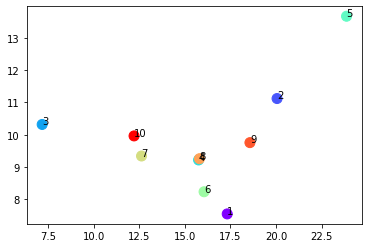

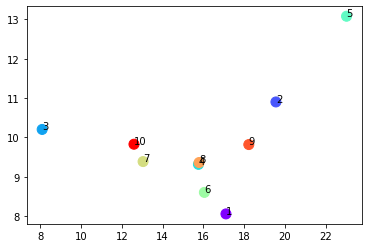

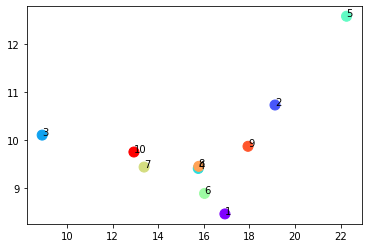

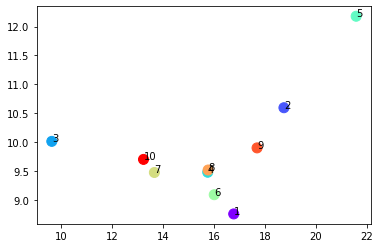

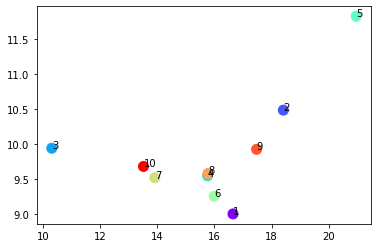

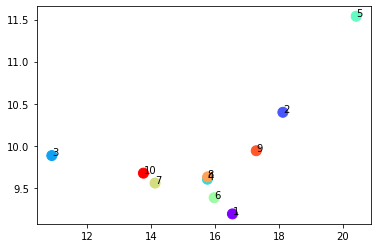

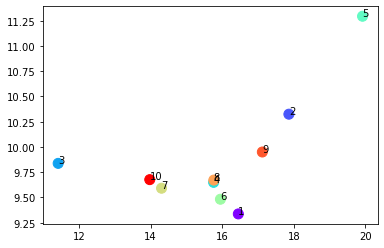

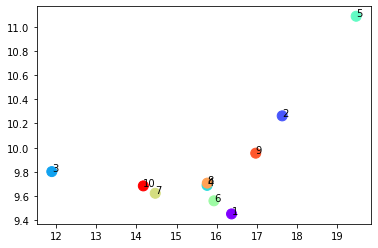

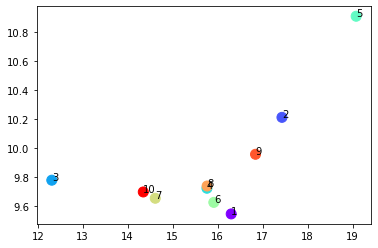

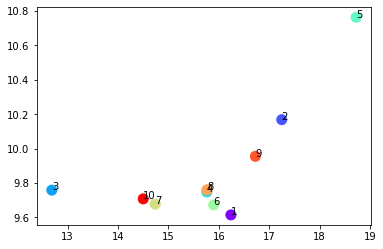

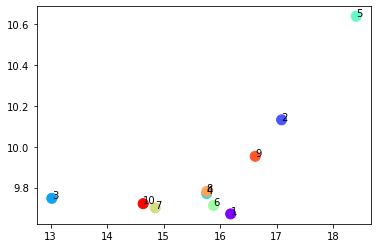

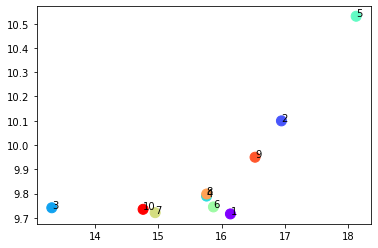

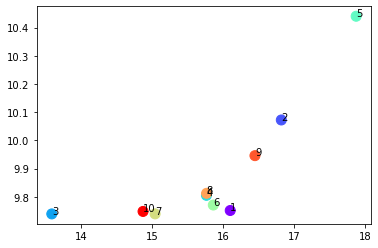

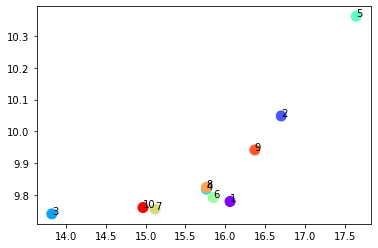

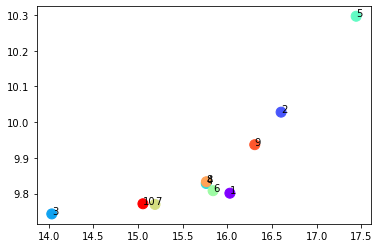

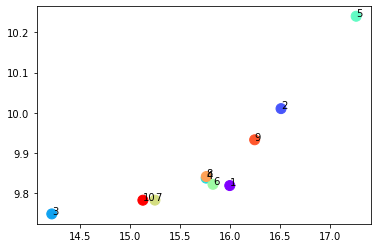

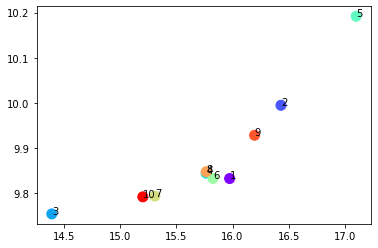

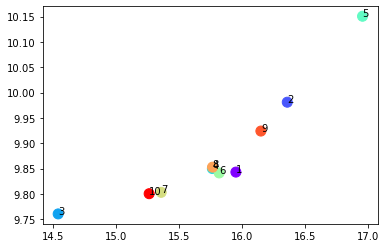

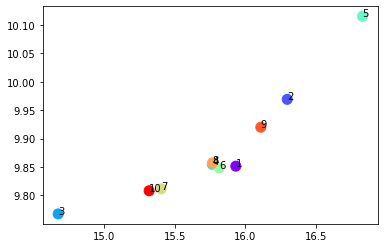

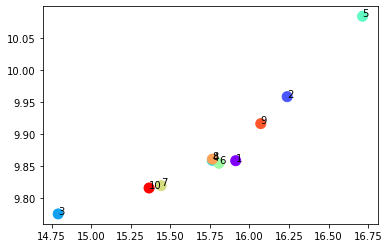

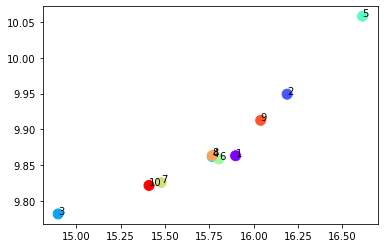

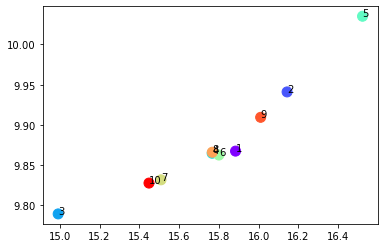

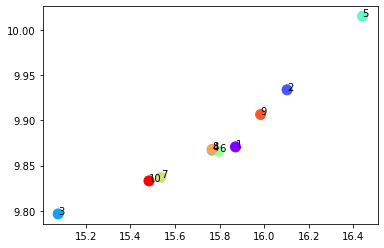

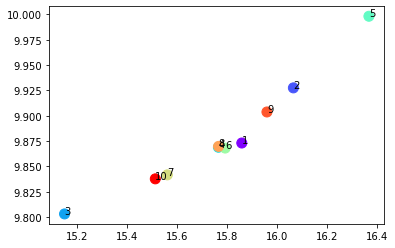

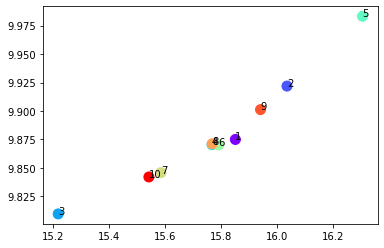

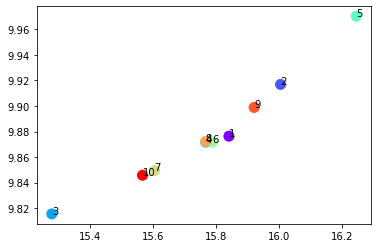

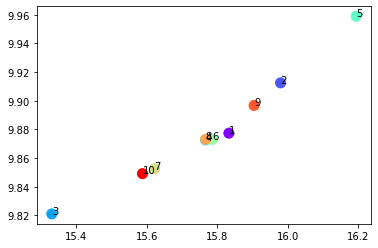

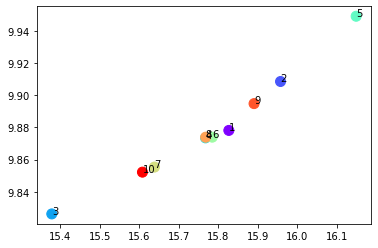

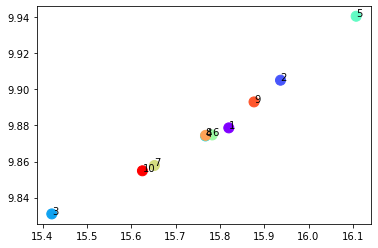

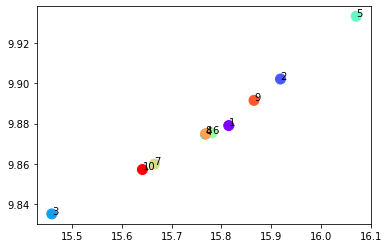

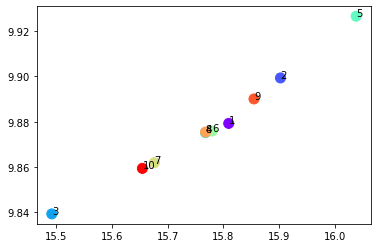

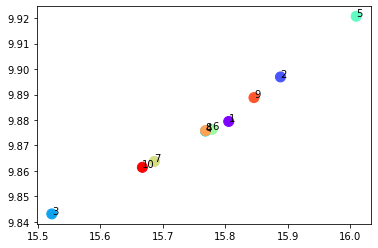

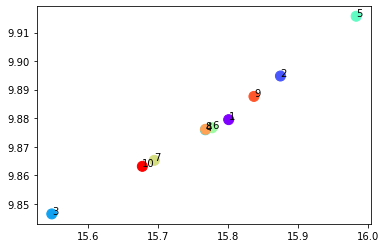

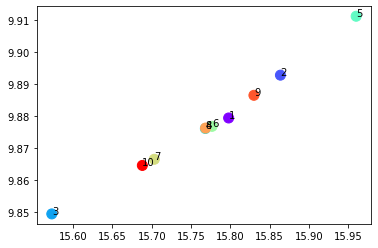

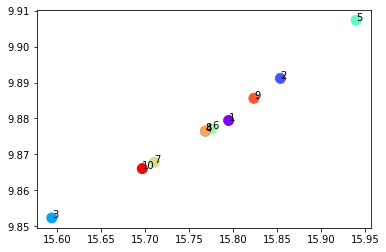

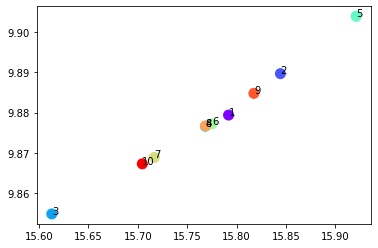

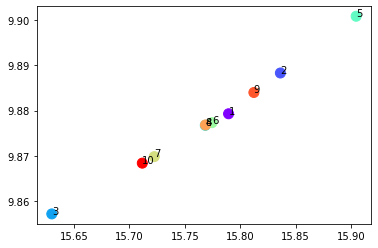

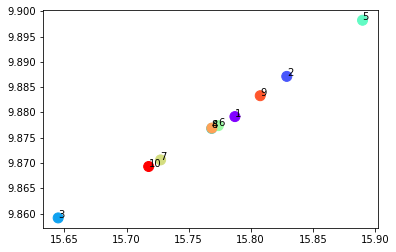

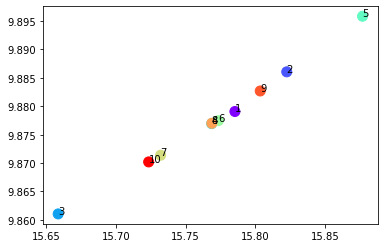

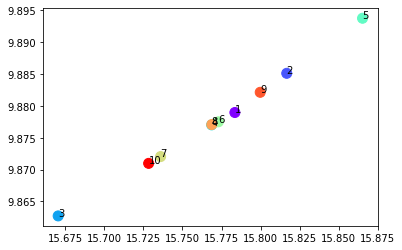

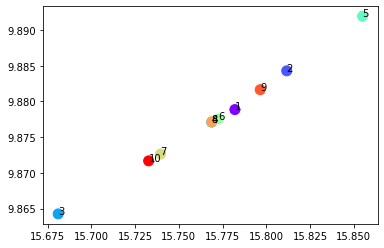

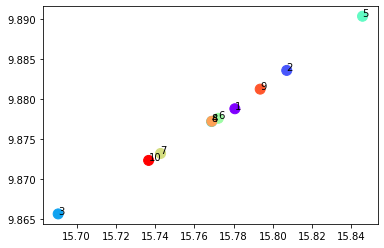

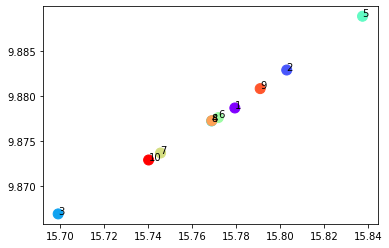

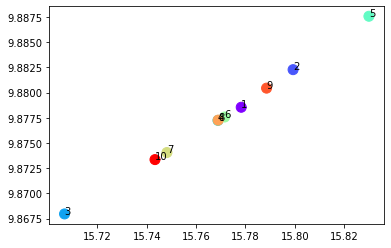

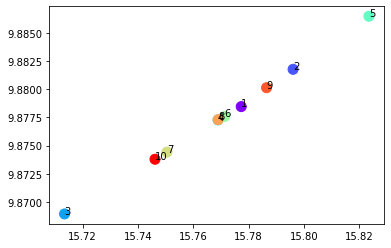

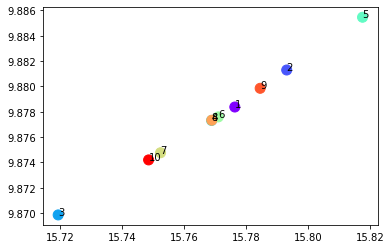

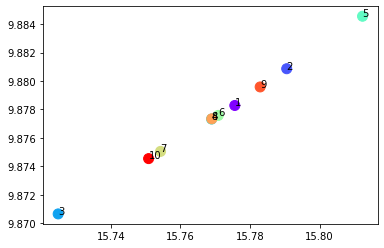

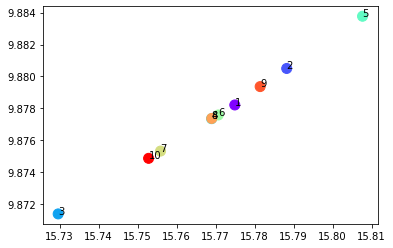

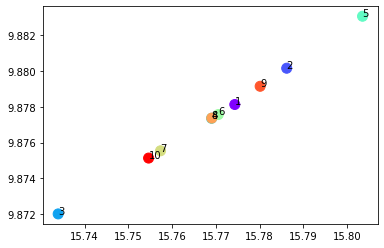

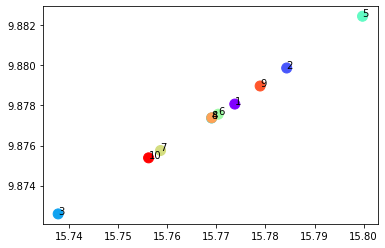

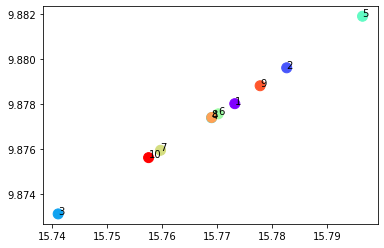

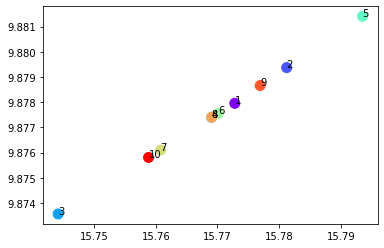

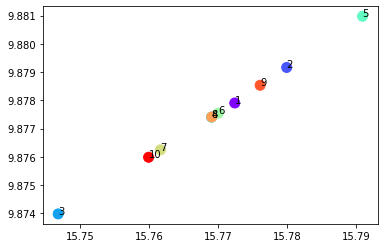

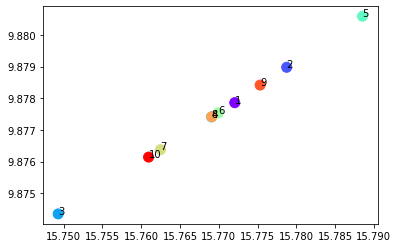



 convergence 
 [0.10949954 0.11134193 0.12330199 0.1052372  0.07483095 0.07762848
 0.09945802 0.07461717 0.14088969 0.08319504]


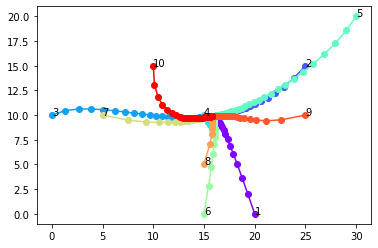

In [22]:
with open("initialCondition.pkl",'rb') as f :
    x,y = pickle.load(f)

camera = Camera(plt.figure())

#main
X = []
Y = []

AA = [[0 for i in range(n)] for j in range(n)]

for t in range(k):
    
    X.extend(x)
    Y.extend(y)
    
    a = np.array(X).reshape(t+1,n)
    b = np.array(Y).reshape(t+1,n)
    
    #for i in range(n):
    #    plt.plot(a[:, i], b[:, i], color=colors[i])
        
    #M = positionToAdjMatrix(x,y,r_det)
    H = np.array(M).reshape(n,n)
    #P = pMatrix(H)
    W = np.dot(P,W)
    A = matriceCom(H,W)
    
    
    #show_graph_with_labels(np.array(M))
    
    plt.scatter(x[0:], y[0:], c=colors, s=100)
    
    for i in range(1,n+1):
        plt.annotate(i, (x[i-1], y[i-1]))
        
    x,y = mouvement(x,y,P)
    
    AA = A
    plt.pause(1.1)
    camera.snap()
    
for i in range(n):
    plt.plot(a[:, i], b[:, i],"o-" ,color=colors[i])
    
for i in range(1,n+1):
    plt.annotate(i, (a[0][i-1], b[0][i-1]))

#print("\n\n matrice de priorité \n",W)
print("\n\n convergence \n",S)

anim = camera.animate(blit=True)



In [23]:
Xpre = (a[0]*S).sum(axis=0)
Ypre = (b[0]*S).sum(axis=0)

print("Prédiction de l'abscice final\n",Xpre)
print("\n Abscisse final de chaque agent :  \n",a[k-1])
print("\nPrédiction de l'ordonné final\n",Ypre)
print("\n Ordonné final de chaque agent :  \n",b[k-1])

Prédiction de l'abscice final
 15.932192862905575

 Abscisse final de chaque agent :  
 [15.772066   15.77876061 15.74929071 15.76907228 15.78854338 15.76993292
 15.76249092 15.76909378 15.77533708 15.76095127]

Prédiction de l'ordonné final
 9.47662839423727

 Ordonné final de chaque agent :  
 [9.87785887 9.87897639 9.87434643 9.87740923 9.88058825 9.8775335
 9.87637638 9.87741461 9.87841507 9.87614089]


In [27]:
print(a[0].sum(axis=0),b[0].sum(axis=0))

160.0 95.0


# Exp2 statique avec A

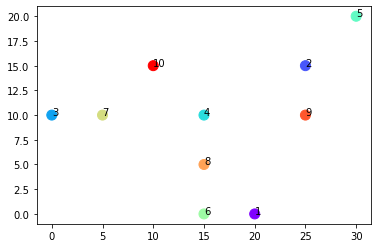

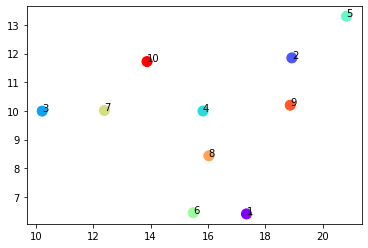

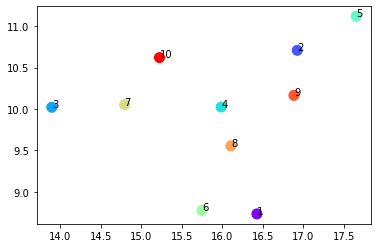

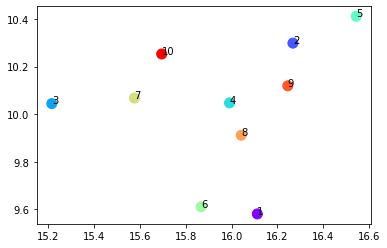

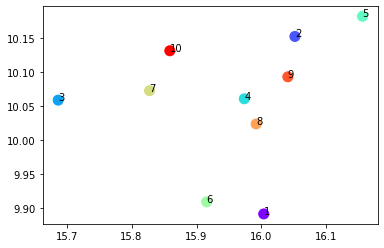

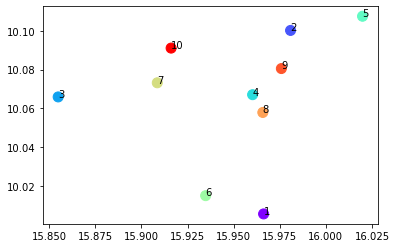

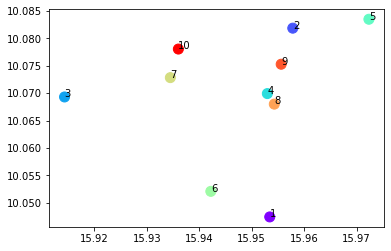

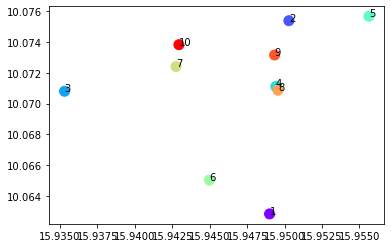

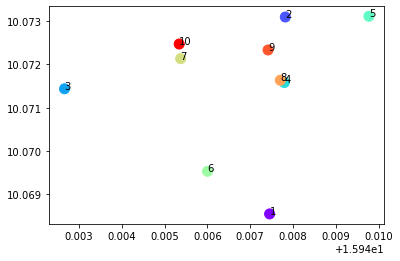

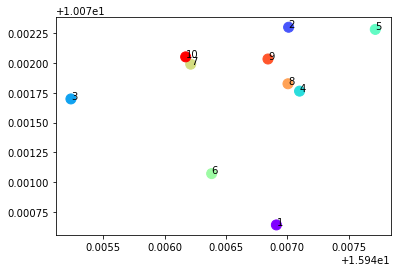

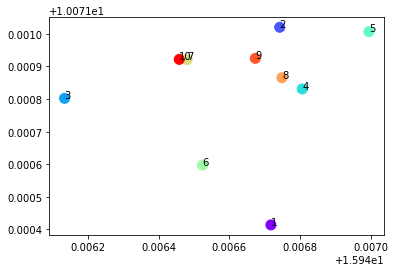

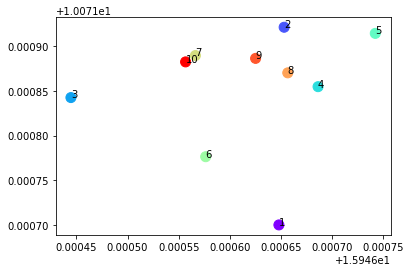

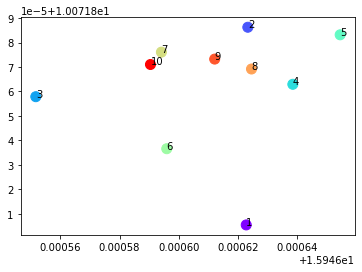

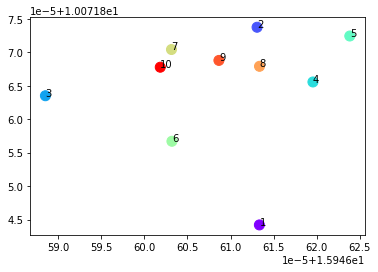

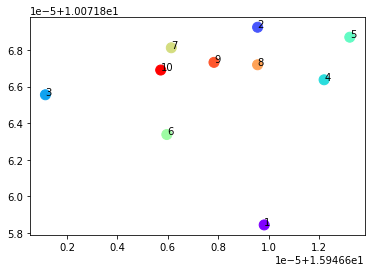

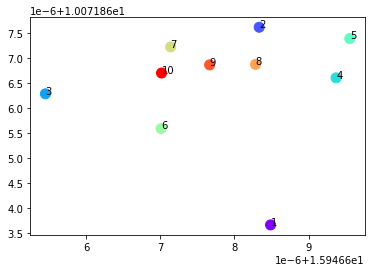

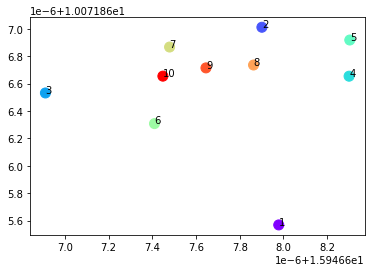

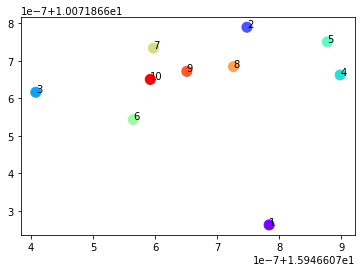

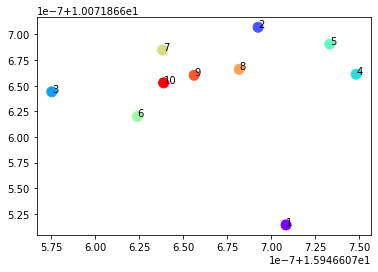

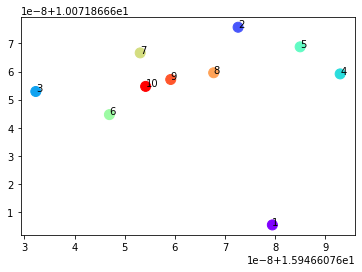

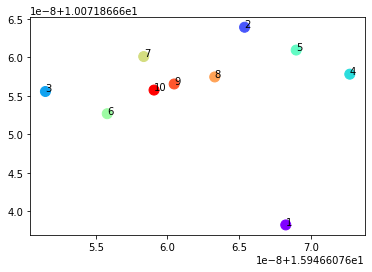

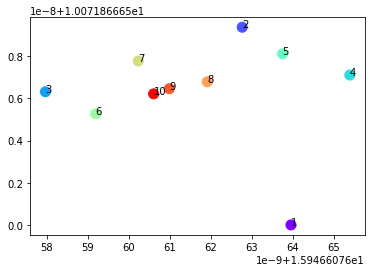

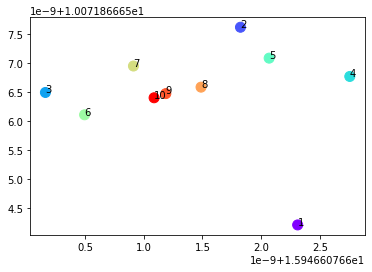

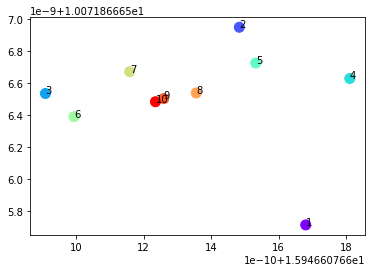

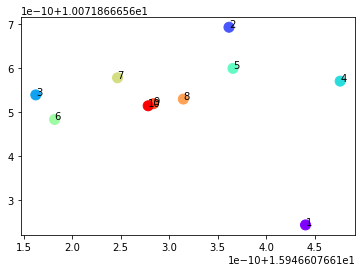

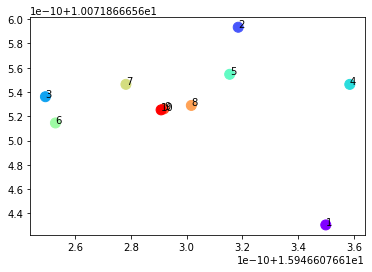

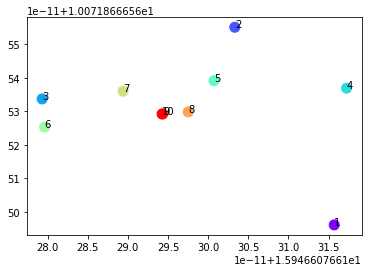

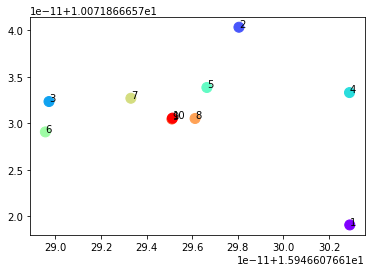

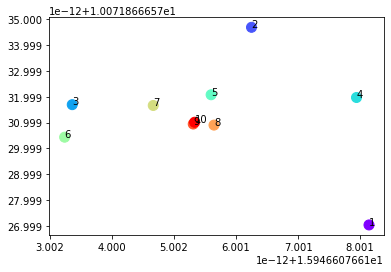

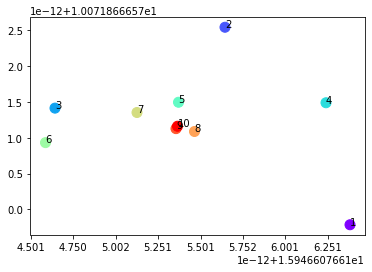

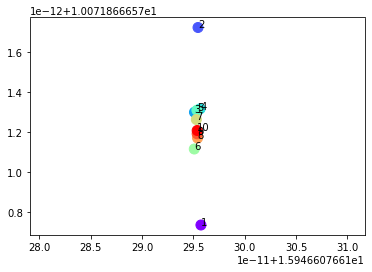

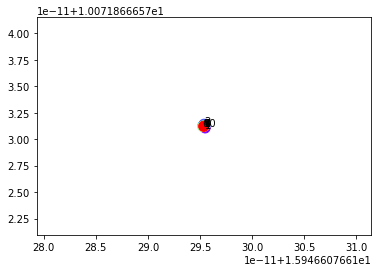

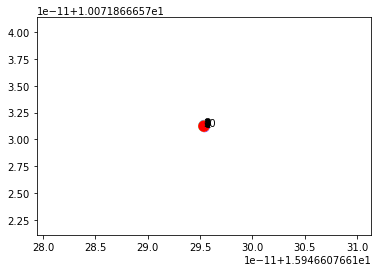

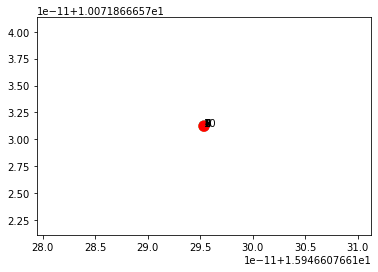

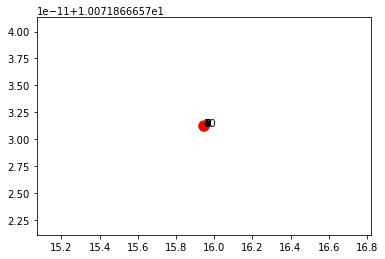

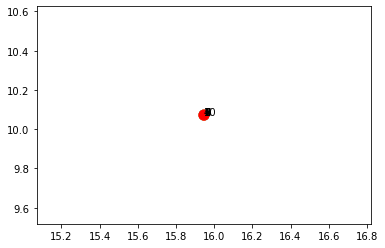

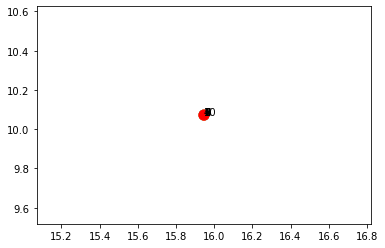

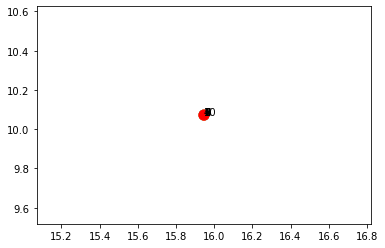

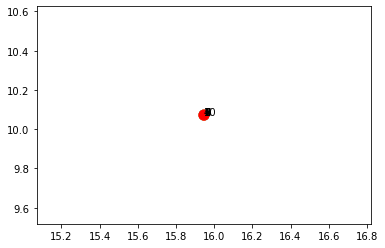

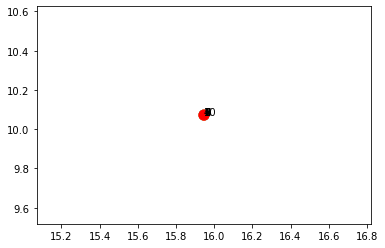

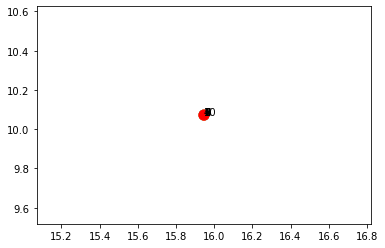

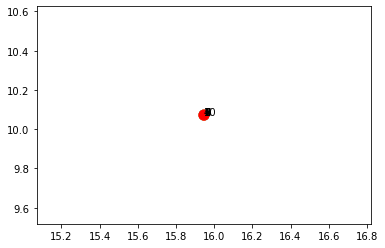

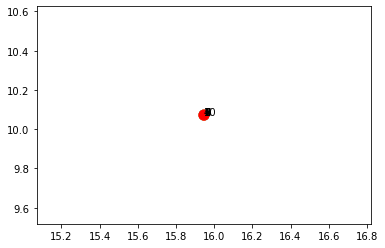

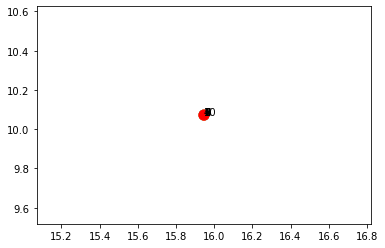

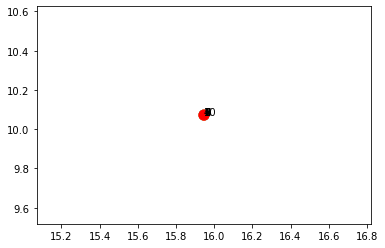

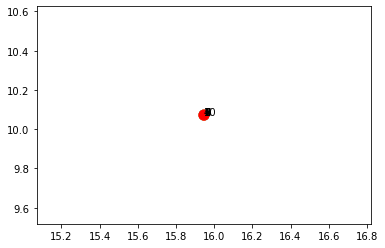

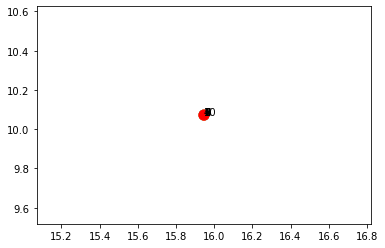

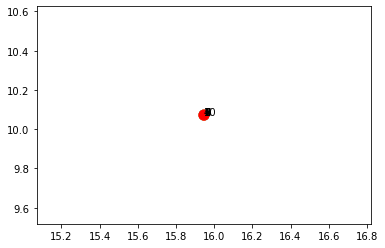

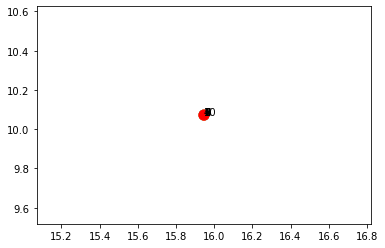

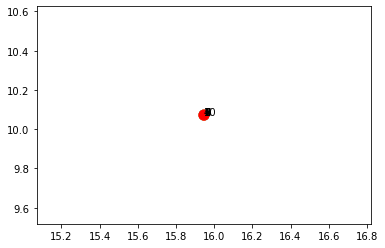

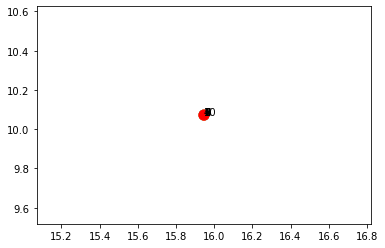

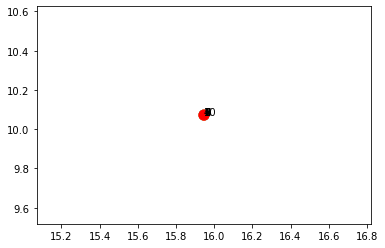

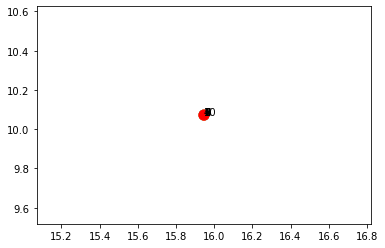

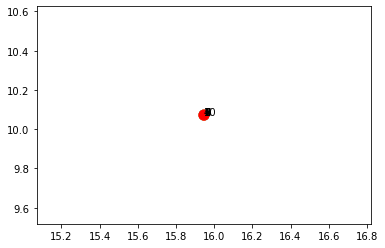

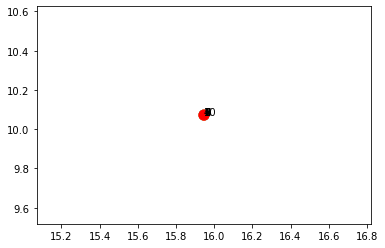

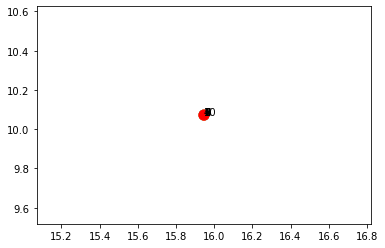

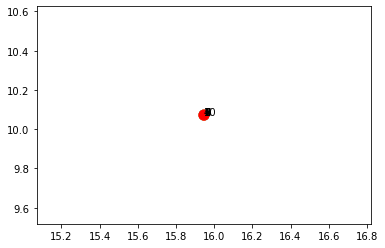

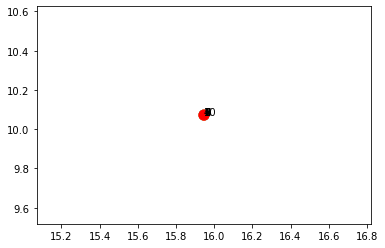

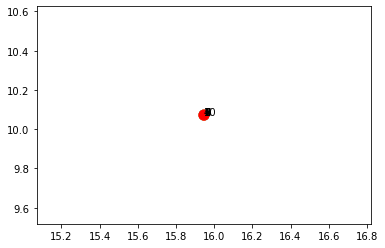

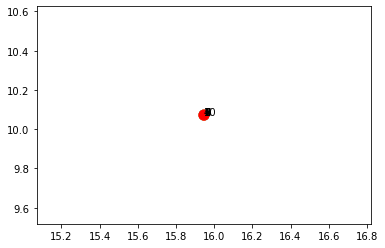



 convergence 
 [0.10949954 0.11134193 0.12330199 0.1052372  0.07483095 0.07762848
 0.09945802 0.07461717 0.14088969 0.08319504]


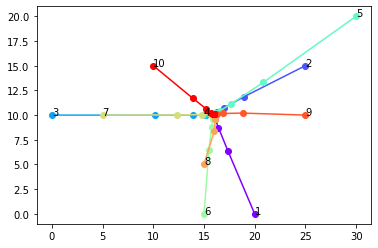

In [24]:
with open("initialCondition.pkl",'rb') as f :
    x,y = pickle.load(f)
    
M = positionToAdjMatrix(x,y,r_det)

camera = Camera(plt.figure())

#main
X = []
Y = []

AA = [[0 for i in range(n)] for j in range(n)]

for t in range(k):
    
    X.extend(x)
    Y.extend(y)
    
    a = np.array(X).reshape(t+1,n)
    b = np.array(Y).reshape(t+1,n)
    
    #for i in range(n):
    #    plt.plot(a[:, i], b[:, i], color=colors[i])
        
    #M = positionToAdjMatrix(x,y,r_det)
    H = np.array(M).reshape(n,n)
    P = pMatrix(H)
    W = np.dot(P,W)
    A = matriceCom(H,W)
    
    
    #show_graph_with_labels(np.array(M))
    
    plt.scatter(x[0:], y[0:], c=colors, s=100)
    
    for i in range(1,n+1):
        plt.annotate(i, (x[i-1], y[i-1]))
        
    x,y = mouvement(x,y,W)
    
    AA = A
    plt.pause(1.1)
    camera.snap()
    
for i in range(n):
    plt.plot(a[:, i], b[:, i],"o-" ,color=colors[i])
    
for i in range(1,n+1):
    plt.annotate(i, (a[0][i-1], b[0][i-1]))

#print("\n\n matrice de priorité \n",W)
print("\n\n convergence \n",S)

anim = camera.animate(blit=True)


In [25]:
print("Prédiction de l'abscice final\n",Xpre)
print("\n Abscisse final de chaque agent :  \n",a[k-1])
print("\nPrédiction de l'ordonné final\n",Ypre)
print("\n Ordonné final de chaque agent :  \n",b[k-1])

Prédiction de l'abscice final
 15.932192862905575

 Abscisse final de chaque agent :  
 [15.94660766 15.94660766 15.94660766 15.94660766 15.94660766 15.94660766
 15.94660766 15.94660766 15.94660766 15.94660766]

Prédiction de l'ordonné final
 9.47662839423727

 Ordonné final de chaque agent :  
 [10.07186666 10.07186666 10.07186666 10.07186666 10.07186666 10.07186666
 10.07186666 10.07186666 10.07186666 10.07186666]
